## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Data/Stroke/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info() # Checking infos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.isna().sum()   #checking for missing values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

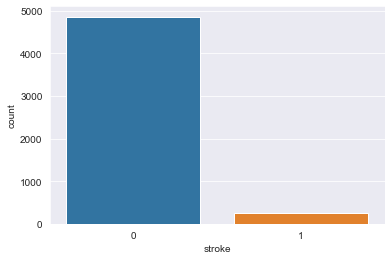

In [5]:
sns.set_style("darkgrid")
sns.countplot(data = df , x = "stroke");

In [6]:
for i in df.columns:
    print(f"The number of unique values in {i} column is/are {len(df[i].unique())}")
    print("\n")
    print(f"The unique values in {i} column is/are {df[i].unique()}")
    print("\n")
    print(f"The value counts for each value in {i} column is/are :  \n{df[i].value_counts()}")
    print("\n\n")
    print("*"*100)
    print("\n\n")

The number of unique values in id column is/are 5110


The unique values in id column is/are [ 9046 51676 31112 ... 19723 37544 44679]


The value counts for each value in id column is/are :  
49152    1
21785    1
25982    1
5500     1
28027    1
        ..
45759    1
4795     1
47802    1
49849    1
16380    1
Name: id, Length: 5110, dtype: int64



****************************************************************************************************



The number of unique values in gender column is/are 3


The unique values in gender column is/are ['Male' 'Female' 'Other']


The value counts for each value in gender column is/are :  
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64



****************************************************************************************************



The number of unique values in age column is/are 104


The unique values in age column is/are [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 

In [7]:
df.drop(["id"] , axis = 1 , inplace = True)  # Droping id columns as it has all unique data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [8]:
cats = df.select_dtypes(include = ["object"]).columns  # Categorical columns
cats

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [9]:
ints = df.select_dtypes(exclude = ["object"]).columns  # Integer columns
ints

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [10]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## EDA (Exploratory data analysis)

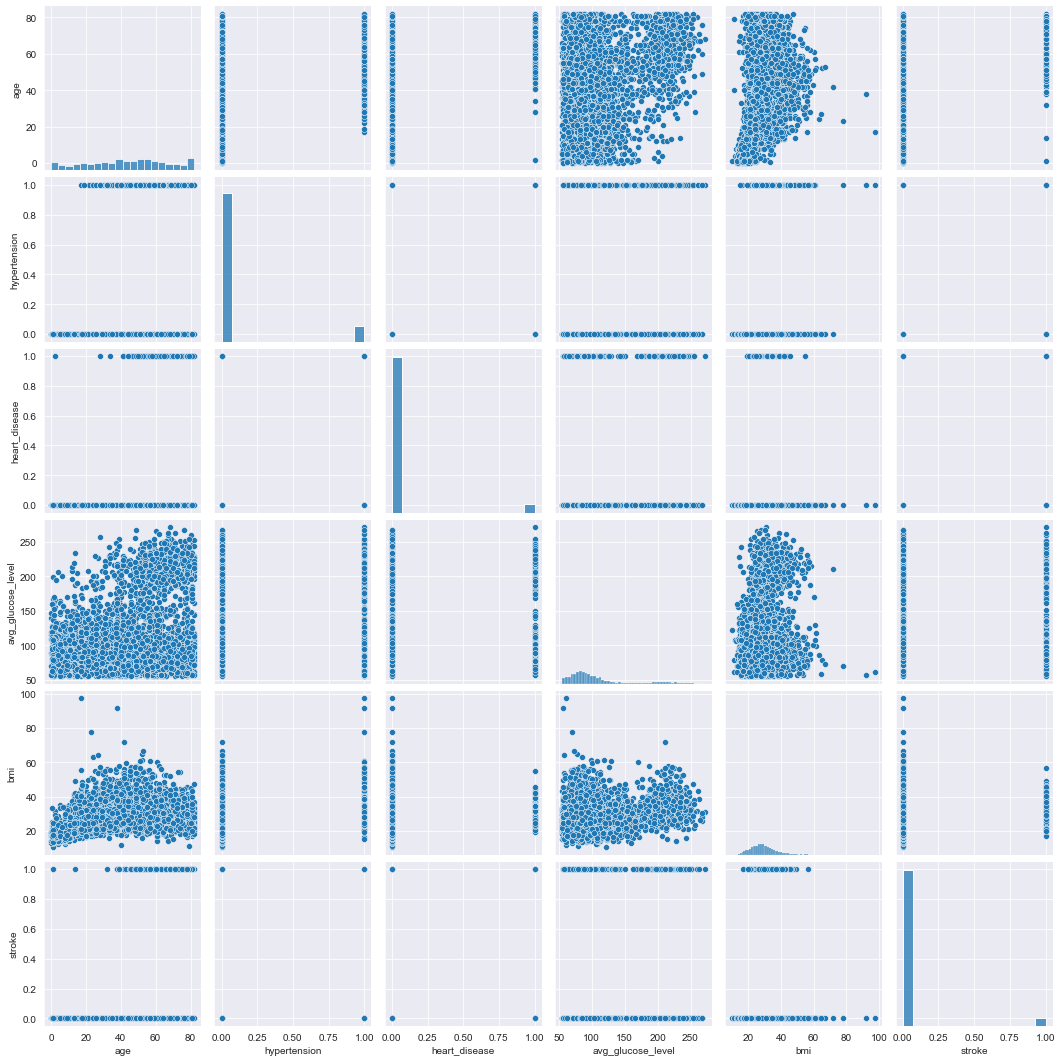

In [11]:
sns.pairplot(df)

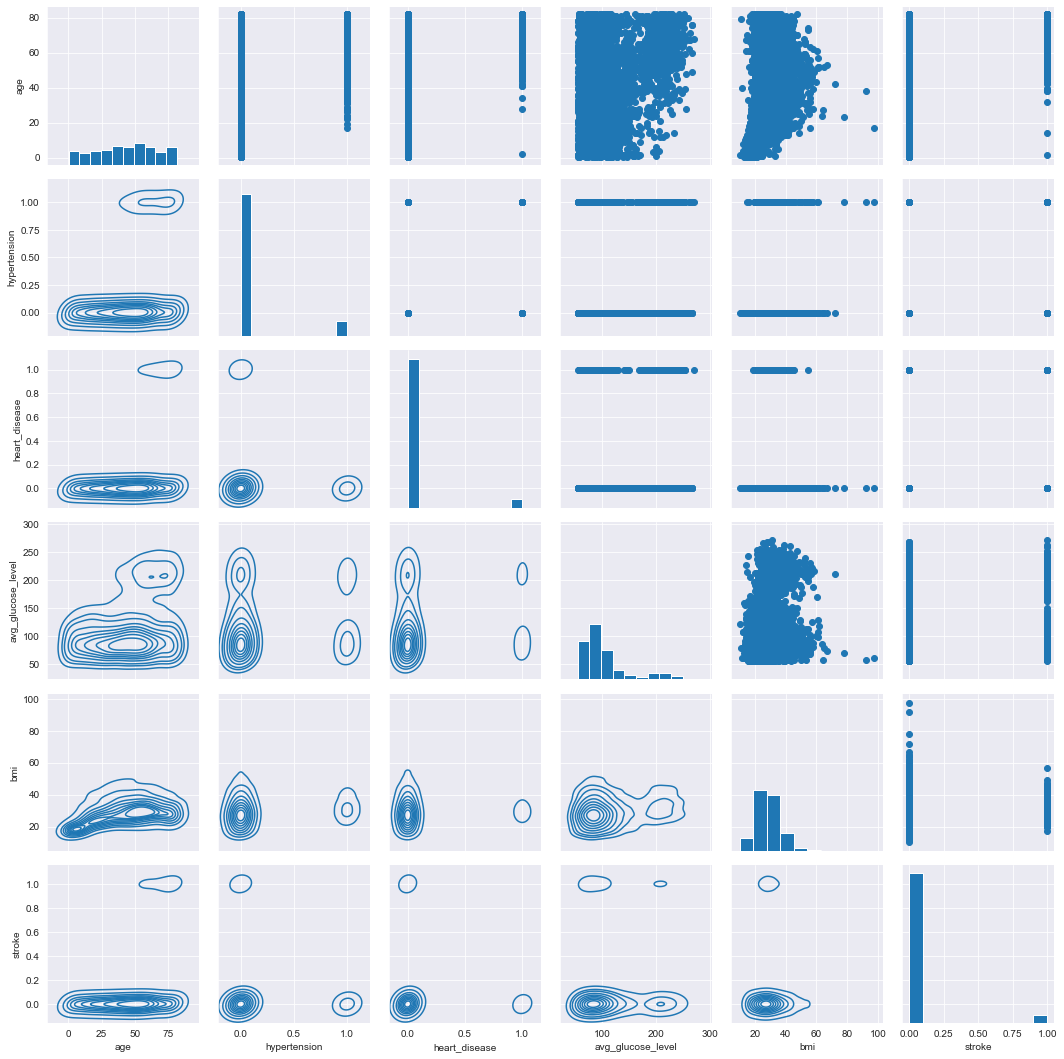

In [12]:
g = sns.PairGrid(df)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

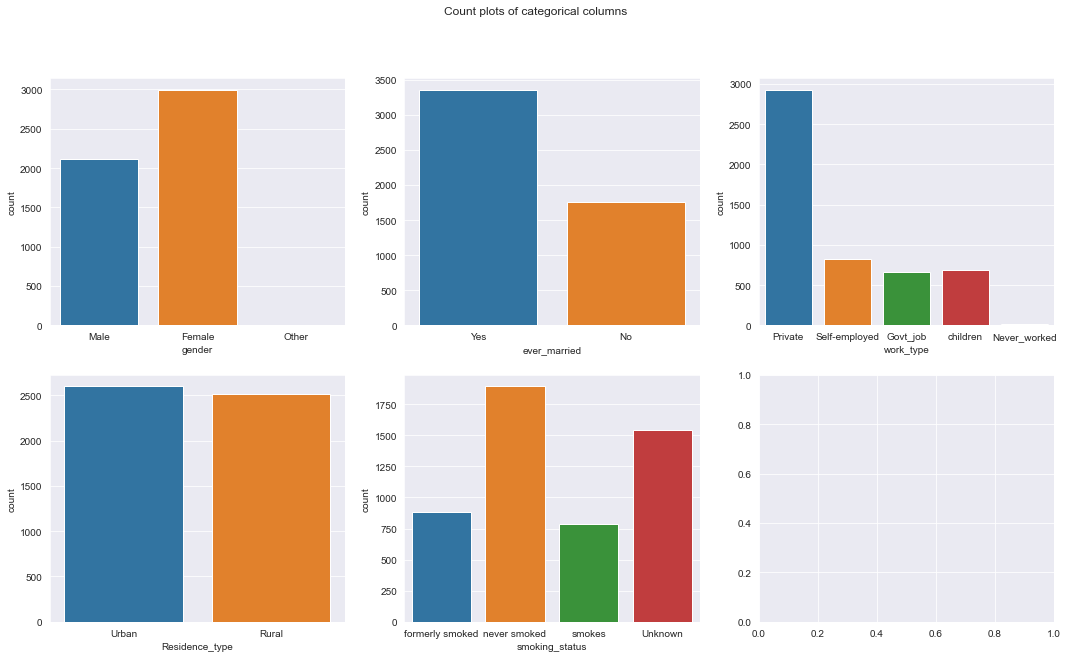

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
  
fig.suptitle('Count plots of categorical columns')
  
sns.countplot(ax = axes[0, 0], data = df, x = 'gender')
sns.countplot(ax = axes[0, 1], data = df, x = 'ever_married')
sns.countplot(ax = axes[0, 2], data = df, x = 'work_type')
sns.countplot(ax = axes[1, 0], data = df, x = 'Residence_type')
sns.countplot(ax = axes[1, 1], data = df, x = 'smoking_status')

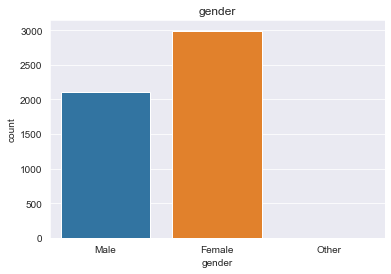

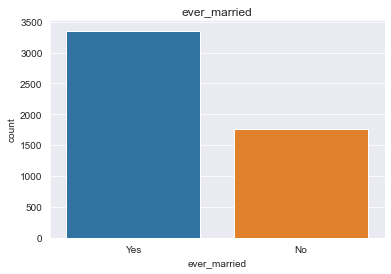

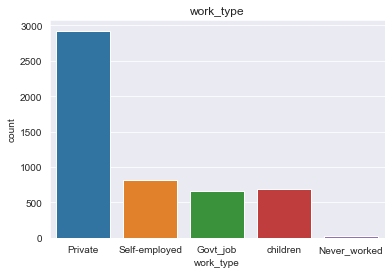

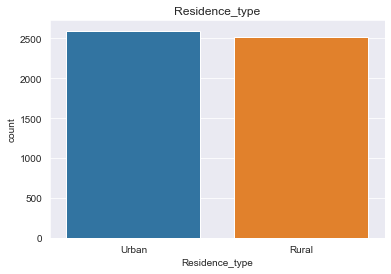

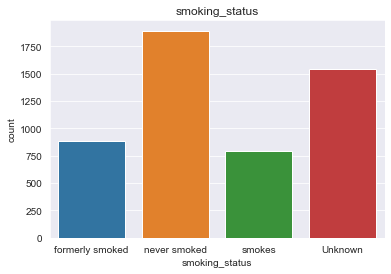

In [14]:
for i , r in enumerate(cats):
    plt.figure()
    plt.title(r)
    sns.countplot(data = df , x = r)

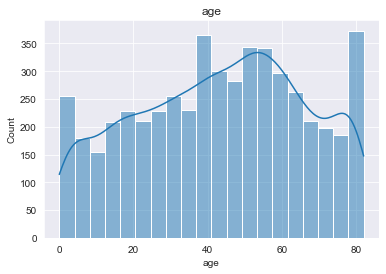

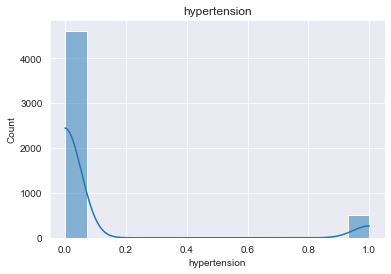

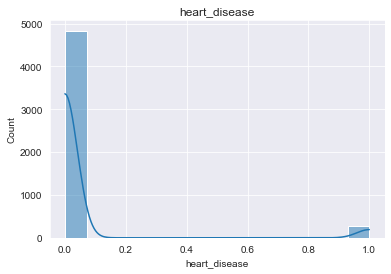

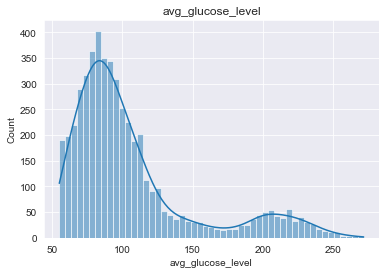

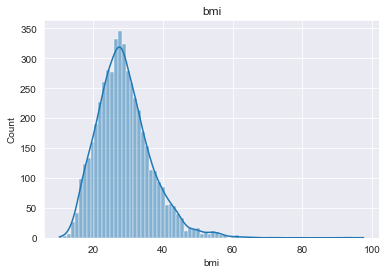

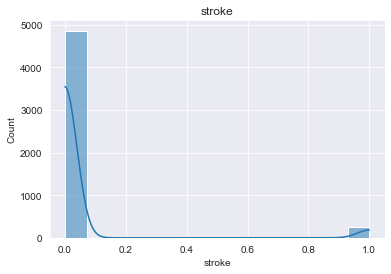

In [15]:
for i , r in enumerate(ints):
    plt.figure()
    plt.title(r)
    sns.histplot(df[r] , kde = True)

<AxesSubplot:>

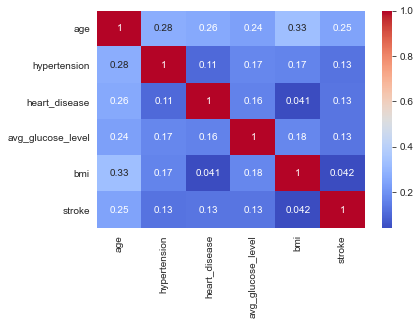

In [16]:
sns.heatmap(df.corr() , annot = True , cmap = "coolwarm") 

In [17]:
cats

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [18]:
ints

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

<AxesSubplot:xlabel='gender', ylabel='bmi'>

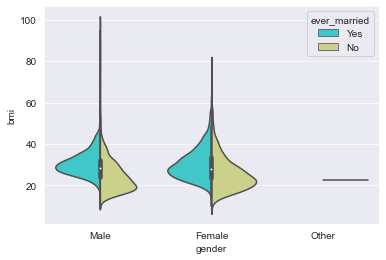

In [19]:
sns.violinplot(x = "gender", y = "bmi", data = df , hue = "ever_married" , palette = 'rainbow' , split = True)

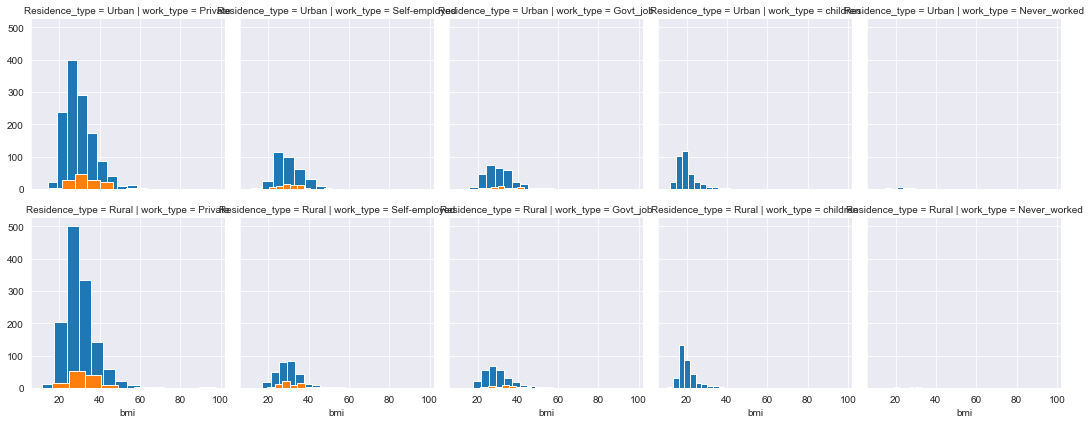

In [20]:
g = sns.FacetGrid(df, col="work_type",  row="Residence_type" , hue = "hypertension")
g = g.map(plt.hist, "bmi")

<AxesSubplot:xlabel='bmi', ylabel='Count'>

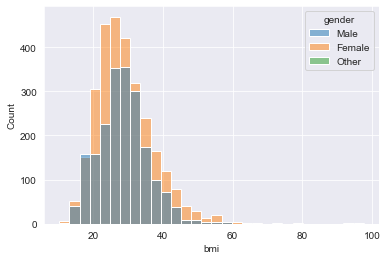

In [21]:
sns.histplot(data = df , x = "bmi" , bins = 30 , hue = "gender")

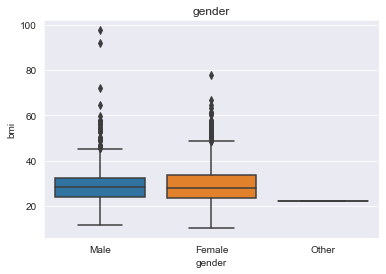

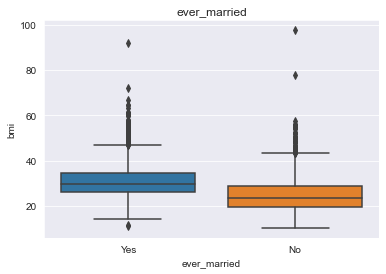

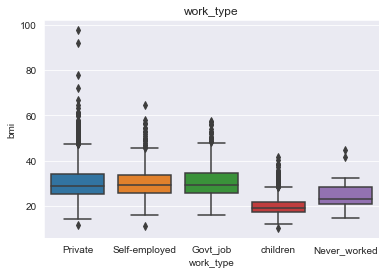

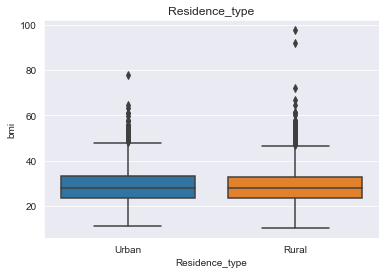

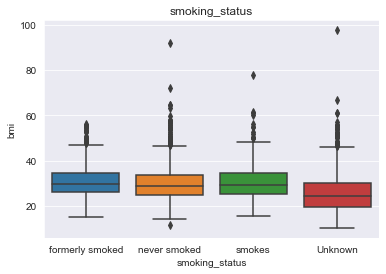

In [22]:
for i , r in enumerate(cats):
        plt.figure()
        plt.title(r)
        sns.boxplot(x = r , y = "bmi" , data = df)

In [23]:
ints = df.select_dtypes(exclude = ["object"]).columns
ints

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [24]:
df["bmi"].median() , df["bmi"].mean()

(28.1, 28.893236911794666)

In [25]:
df["bmi"].fillna(df["bmi"].median() , inplace = True)
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [26]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [27]:
df.loc[df["gender"] == "Other" , "gender"] = "Female"

In [28]:
df["gender"].value_counts()

Female    2995
Male      2115
Name: gender, dtype: int64

## Label encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

df["gender"] = lb.fit_transform(df["gender"])
df["ever_married"] = lb.fit_transform(df["ever_married"])
df["Residence_type"] = lb.fit_transform(df["Residence_type"])

In [30]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.1,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1


In [31]:
for i in df.columns:
    print(f"The number of unique values in {i} column is/are {len(df[i].unique())}")
    print("\n")
    print(f"The unique values in {i} column is/are {df[i].unique()}")
    print("\n")
    print(f"The value counts for each value in {i} column is/are :  \n{df[i].value_counts()}")
    print("\n\n")
    print("*"*100)
    print("\n\n")

The number of unique values in gender column is/are 2


The unique values in gender column is/are [1 0]


The value counts for each value in gender column is/are :  
0    2995
1    2115
Name: gender, dtype: int64



****************************************************************************************************



The number of unique values in age column is/are 104


The unique values in age column is/are [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3

In [32]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [33]:
df = pd.get_dummies(df , columns = ["work_type" , "smoking_status"] , prefix = ["work_type" , "smoking_status"])
df.drop(["work_type_Govt_job" , "smoking_status_Unknown"] , axis = 1 , inplace = True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.1,1,0,0,1,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,1,0


## Train Test Split

In [34]:
from sklearn.model_selection import train_test_split
X = df.drop(["stroke"] , axis = 1 )
y = df["stroke"]
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [35]:
len(X_train) , len(X_test)

(4088, 1022)

## Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = ["age" , "avg_glucose_level" , "bmi"]
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

In [37]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
802,1,1.584155,0,0,1,0,0.135593,-0.054102,0,0,1,0,1,0,0
3927,0,0.829708,0,0,1,1,-0.397457,0.951155,0,1,0,0,0,0,0
2337,0,-0.989841,0,0,0,0,-1.028701,0.616069,0,1,0,0,0,1,0
3910,1,-0.546049,0,0,1,1,-0.893246,0.190768,0,0,0,0,1,0,0
1886,0,-0.546049,0,0,0,0,-1.026290,-1.162462,0,1,0,0,0,1,0


## Upsampling data with SMOTE

In [38]:
from imblearn.over_sampling import SMOTE
y_train.value_counts()

0    3901
1     187
Name: stroke, dtype: int64

In [39]:
sm = SMOTE(random_state = 42)
X_train_1, y_train_1 = sm.fit_resample(X_train , y_train.ravel())
sum(y_train_1 == 1) , sum(y_train == 0)

(3901, 3901)

In [40]:
X_test.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4688,1,-0.546049,0,0,0,0,-0.911877,-0.762937,0,0,1,0,0,0,0
4478,1,-0.146636,0,0,1,0,-0.902233,-0.079878,0,0,1,0,0,1,0
3849,0,-1.566771,0,0,0,1,-0.702120,-0.827377,0,0,0,1,0,0,0
4355,0,1.584155,1,0,1,0,-0.653462,-1.214014,0,0,1,0,0,1,0
3826,0,1.406638,0,0,1,0,-0.256085,-0.221645,0,0,0,0,0,1,0


## Model Fitting and Evaluation

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix , roc_auc_score , precision_score , recall_score , f1_score , accuracy_score , classification_report , roc_curve , auc
from sklearn.model_selection import cross_val_score

In [42]:
models = []
models.append(['XGBClassifier', XGBClassifier(learning_rate = 0.1 , objective = 'binary:logistic' , random_state = 42 , eval_metric='mlogloss')])
models.append(['Logistic Regression', LogisticRegression(random_state = 42)])
models.append(['SVM', SVC(random_state = 42)])
models.append(['KNeigbors', KNeighborsClassifier()])
models.append(['RandomForest', RandomForestClassifier(random_state = 42)])
models.append(['AdaBoostClassifier', AdaBoostClassifier()])

In [43]:
sam1 = []
for i in range(len(models)):
    sam2 = []
    model = models[i][1]
    model.fit(X_train_1 , y_train_1)
    
    
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test , y_pred)
    
    
    accuracies = cross_val_score(estimator = model, X = X_train_1 , y = y_train_1, cv = 5)
    roc = roc_auc_score(y_test , y_pred)
    precision = precision_score(y_test , y_pred)
    recall = recall_score(y_test , y_pred)
    f1 = f1_score(y_test , y_pred)
    
    
    
    print(models[i][0],':')
    print(cm)
    print('Accuracy Score: ' , accuracy_score(y_test,y_pred))
    print('\n')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('\n')
    print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    print('\n')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('\n')
    print('Precision: {:.2f} %'.format(precision))
    print('\n')
    print('Recall: {:.2f} %'.format(recall))
    print('\n')
    print('F1 Score: {:.2f} %'.format(f1))
    print("\n")
    print('*'*40)
    print('\n\n\n')
    
    
    
    sam2.append(models[i][0])
    sam2.append(accuracy_score(y_test , y_pred)*100)
    sam2.append(accuracies.mean()*100)
    sam2.append(accuracies.std()*100)
    sam2.append(roc)
    sam2.append(precision)
    sam2.append(recall)
    sam2.append(f1)
    sam1.append(sam2)

XGBClassifier :
[[874  86]
 [ 46  16]]
Accuracy Score:  0.8708414872798435


K-Fold Validation Mean Accuracy: 92.02 %


Standard Deviation: 1.67 %


ROC AUC Score: 0.58 %


Precision: 0.16 %


Recall: 0.26 %


F1 Score: 0.20 %


****************************************




Logistic Regression :
[[748 212]
 [ 18  44]]
Accuracy Score:  0.7749510763209393


K-Fold Validation Mean Accuracy: 79.93 %


Standard Deviation: 2.11 %


ROC AUC Score: 0.74 %


Precision: 0.17 %


Recall: 0.71 %


F1 Score: 0.28 %


****************************************




SVM :
[[778 182]
 [ 28  34]]
Accuracy Score:  0.7945205479452054


K-Fold Validation Mean Accuracy: 86.54 %


Standard Deviation: 1.29 %


ROC AUC Score: 0.68 %


Precision: 0.16 %


Recall: 0.55 %


F1 Score: 0.24 %


****************************************




KNeigbors :
[[775 185]
 [ 36  26]]
Accuracy Score:  0.7837573385518591


K-Fold Validation Mean Accuracy: 88.98 %


Standard Deviation: 0.71 %


ROC AUC Score: 0.61 %


Precision: 0.

## Model Selection

In [44]:
df2 = pd.DataFrame(sam1 , columns = ['Model','Accuracy','K-Fold Mean Accuracy','Std.Deviation','ROC_AUC','Precision','Recall','F1 Score'])

df2.sort_values(by = ["F1 Score" , "ROC_AUC" , 'K-Fold Mean Accuracy' , "Accuracy"] , inplace = True , ascending = False)
df2

,Model,Accuracy,K-Fold Mean Accuracy,Std.Deviation,ROC_AUC,Precision,Recall,F1 Score
1,Logistic Regression,77.495108,79.928662,2.110037,0.744422,0.171875,0.709677,0.276730
5,AdaBoostClassifier,77.005871,81.940891,2.283094,0.726731,0.163424,0.677419,0.263323
2,SVM,79.452055,86.542289,1.285326,0.679402,0.157407,0.548387,0.244604
4,RandomForest,89.041096,93.976067,0.559788,0.587114,0.187500,0.241935,0.211268
0,XGBClassifier,87.084149,92.015252,1.669279,0.584241,0.156863,0.258065,0.195122
3,KNeigbors,78.375734,88.977381,0.714009,0.613323,0.123223,0.419355,0.190476


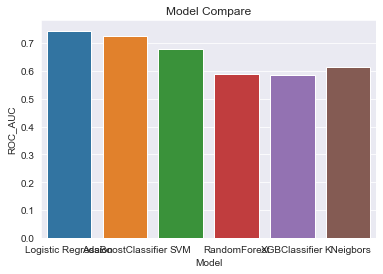

In [45]:
sns.barplot(x = "Model" , y = "ROC_AUC" , data = df2)
plt.title("Model Compare");

              precision    recall  f1-score   support

           0       0.98      0.78      0.87       960
           1       0.17      0.71      0.28        62

    accuracy                           0.77      1022
   macro avg       0.57      0.74      0.57      1022
weighted avg       0.93      0.77      0.83      1022





ROC AUC score: 0.8096102150537634
Accuracy Score:  0.7749510763209393






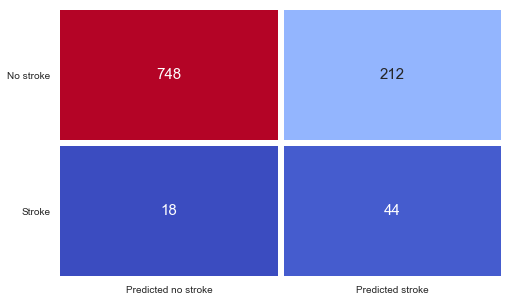

Text(0.5, 0, 'False Positive Rate')

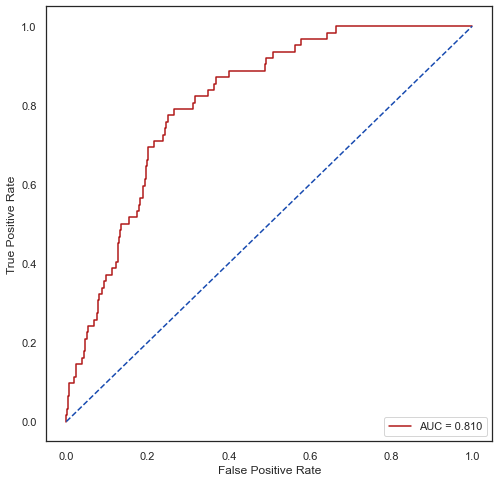

In [47]:
linear = LogisticRegression(random_state = 42)
linear.fit(X_train_1, y_train_1)
y_pred = linear.predict(X_test)
y_prob = linear.predict_proba(X_test)[ : , 1]
cm = confusion_matrix(y_test , y_pred)

print(classification_report(y_test, y_pred))
print("\n\n\n")
print(f'ROC AUC score: {roc_auc_score(y_test , y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test , y_pred))
print("\n\n\n")

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'coolwarm', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate , true_positive_rate , color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [48]:
preds = linear.predict(X_test)
sum(preds == 0) , sum(preds == 1)

(766, 256)

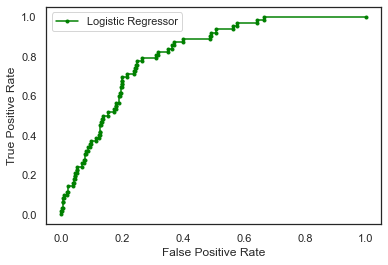

In [49]:
predicted_probab = linear.predict_proba(X_test)
predicted_probab = predicted_probab[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab)

plt.plot(fpr, tpr, marker='.', color='green',label="Logistic Regressor")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Logistic Regressor Model with AUC of 80.96 percent